In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [53]:
def esr_spectrum(freq, *param):
    pl = param[0]
    contrast = param[1]
    gamma = param[2]
    df = param[3]
    counts = pl*(1 - contrast*((gamma/2)**2)/((freq-df/2)**2 + (gamma/2)**2)
           - contrast*((gamma/2)**2)/((freq+df/2)**2 + (gamma/2)**2))
    return counts

In [75]:
f = np.linspace(-30, 30, 50)
counts = esr_spectrum(f, 1e4, 0.15, 8, 10)
shotNoise = np.random.normal(np.sqrt(counts), np.sqrt(counts))
signal = counts+shotNoise

In [76]:
pguess = [1e4, 0.15, 8, 10]
popt, pcov = curve_fit(esr_spectrum, f, signal, pguess)

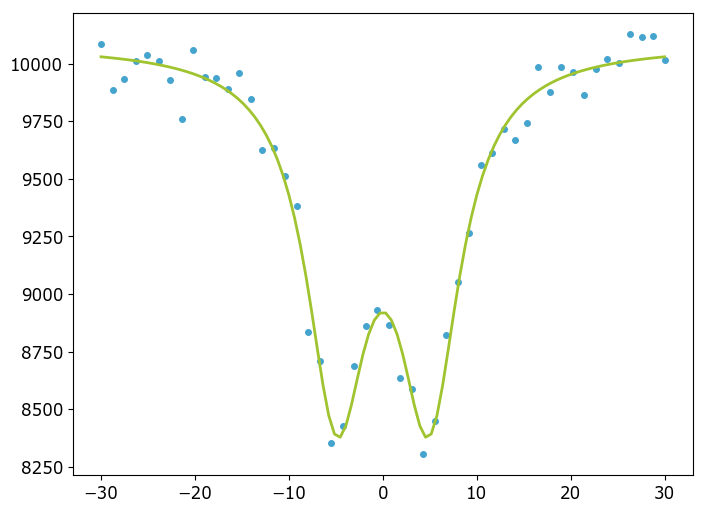

In [77]:
ffit = np.linspace(f[0],f[-1],100)
fig, ax = plt.subplots()
plt.plot(f, signal, 'o')
plt.plot(ffit, esr_spectrum(ffit, *popt))